In [16]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
# get dataset

# train data
dtr = pd.read_csv('~/Documents/ML-USU-SP21-main/dataset/dsn-prebootcamp-2021/train.csv')
X_tr = dtr.drop(['Customer_ID','Certification','Effective To Date','Active_Policy','Sales Channel','Best_Offer'],axis = 1)
y_tr = pd.DataFrame(dtr['Best_Offer'])

# test data
dte = pd.read_csv('~/Documents/ML-USU-SP21-main/dataset/dsn-prebootcamp-2021/test.csv')
X_te = dte.drop(['Customer_ID','Certification','Effective To Date','Active_Policy','Sales Channel'],axis = 1)
# sum(dtr.duplicated())
# sum(dte.duplicated())

In [18]:
# X_tr.info()
# X_te.info()
# X_te.nunique()

pd.crosstab(y_tr['Best_Offer'], y_tr['Best_Offer'], normalize='all') * 100
# y_tr.unique()

# y_tr['Best_Offer'].value_counts()

Best_Offer,0,1,2,3
Best_Offer,,,,
0,41.295167,0.000000,0.00000,0.000000
1,0.000000,32.003754,0.00000,0.000000
2,0.000000,0.000000,15.28234,0.000000
3,0.000000,0.000000,0.00000,11.418739


In [19]:
Le = LabelEncoder()

# train dataset

X_tr['Sex'] = Le.fit_transform(X_tr['Sex'])
X_tr['Region_Code'] = Le.fit_transform(X_tr['Region_Code'])
X_tr['Marital Status'] = Le.fit_transform(X_tr['Marital Status'])
X_tr['State_of_Origin'] = Le.fit_transform(X_tr['State_of_Origin'])
X_tr['Customer_Reply'] = Le.fit_transform(X_tr['Customer_Reply'])
X_tr['Plan'] = Le.fit_transform(X_tr['Plan'])
X_tr['Status_of_Employment'] = Le.fit_transform(X_tr['Status_of_Employment'])
X_tr['Vehicle Class'] = Le.fit_transform(X_tr['Vehicle Class'])
X_tr['Vehicle Size'] = Le.fit_transform(X_tr['Vehicle Size'])
X_tr['kind_of_policy'] = Le.fit_transform(X_tr['kind_of_policy'])

# test dataset

X_te['Sex'] = Le.fit_transform(X_te['Sex'])
X_te['Region_Code'] = Le.fit_transform(X_te['Region_Code'])
X_te['Marital Status'] = Le.fit_transform(X_te['Marital Status'])
X_te['State_of_Origin'] = Le.fit_transform(X_te['State_of_Origin'])
X_te['Customer_Reply'] = Le.fit_transform(X_te['Customer_Reply'])
X_te['Plan'] = Le.fit_transform(X_te['Plan'])
X_te['Status_of_Employment'] = Le.fit_transform(X_te['Status_of_Employment'])
X_te['Vehicle Class'] = Le.fit_transform(X_te['Vehicle Class'])
X_te['Vehicle Size'] = Le.fit_transform(X_te['Vehicle Size'])
X_te['kind_of_policy'] = Le.fit_transform(X_te['kind_of_policy'])

In [5]:
X_tr.tail(20)

,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Status_of_Employment,Premium_Auto_per_Month,Total Claim Amount,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy
6373,1,80210,1,0,0,8348.019875,1,1,1,208,878.413622,0,1,21,26,0,3,1
6374,1,167692,1,1,0,8719.049833,0,0,1,148,355.200000,0,0,22,94,6,2,1
6375,0,181566,2,0,3,32866.404600,1,0,1,208,285.745227,3,2,0,38,4,2,1
6376,0,109502,1,1,4,9113.756420,1,0,1,228,721.241935,3,1,6,50,0,3,1
6377,0,81128,0,1,0,11728.189210,1,2,1,194,85.968142,0,2,0,36,0,2,1
6378,0,67302,2,1,2,24251.336850,1,0,1,138,328.654130,0,1,21,37,2,2,1
6379,0,75280,2,0,0,5286.312599,1,0,1,134,174.046849,5,1,25,74,0,4,1
6380,0,0,1,0,0,7224.850848,1,0,3,136,350.207614,0,2,5,36,0,2,1
6381,1,0,1,2,0,6537.560574,1,0,3,130,468.000000,0,1,14,62,0,2,0
6382,0,143184,0,0,3,8744.057760,1,0,1,144,141.725051,0,1,15,18,0,2,1


In [6]:
features = list(X_tr.columns)
features

['Sex',
 'Earnings',
 'Region_Code',
 'Marital Status',
 'State_of_Origin',
 'Customer_Worth',
 'Customer_Reply',
 'Plan',
 'Status_of_Employment',
 'Premium_Auto_per_Month',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Counts_of_Open_Complaints',
 'No_Of_POlicy',
 'kind_of_policy']

In [21]:
nv =  GaussianNB()
pipe = Pipeline(steps = [
    ('scale' , StandardScaler()),
    ('model' , nv)
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', GaussianNB())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GaussianNB(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__priors': None,
 'model__var_smoothing': 1e-09}

In [22]:
# grid = GridSearchCV(
#     estimator = pipe,
#     param_grid = {},
# #     return_train_score=True,
#     cv = 10,
#     n_jobs = -1 
# )
model = pipe.fit(X_tr, y_tr)
model

Pipeline(steps=[('scale', StandardScaler()), ('model', GaussianNB())])

In [9]:
grid.best_params_

{'model__n_neighbors': 9}

In [10]:
grid.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=9))])

In [23]:
y_pred = model.predict(X_te)
# pd.DataFrame(model.cv_results_)
y = pd.DataFrame(y_pred)

In [24]:
df = pd.concat([dte['Customer_ID']], axis = 1)
df['Best_Offer'] = y
df.to_csv('submit.csv',index=False)

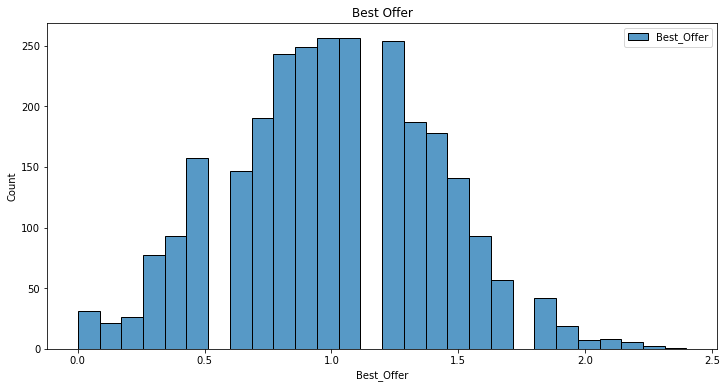

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(y)
plt.title('Best Offer')
plt.xlabel('Best_Offer')
plt.savefig('best_offer.png')
plt.legend(['Best_Offer'])
plt.show()

<Figure size 432x288 with 0 Axes>